In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import math
import seaborn as sns

In [5]:
train = pd.read_csv("Train_aBjfeNk.csv")
test = pd.read_csv("Test_LqhgPWU.csv")

In [6]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Missing values

In [54]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [9]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [61]:
# Ever_married is imputed with its mode
train['Ever_Married'].fillna(train['Ever_Married'].mode()[0],inplace = True)
test['Ever_Married'].fillna(test['Ever_Married'].mode()[0],inplace = True)

In [71]:
train[train['Age'] <20]['Graduated'].value_counts()

No     260
Yes      3
Name: Graduated, dtype: int64

#### We can see customers whose age is below 20 are less likely to be graduated. We will impute graduated yes for age > 20 and No for age< 20

In [119]:
def fillnull_Grad(a,b):
    if (a is np.nan):
        if b <= 20:
            return('No')
        else:
            return('Yes')
    else:
        return(a)

In [122]:
train['Graduated'] = train.apply(lambda x: fillnull_Grad(x['Graduated'],x['Age']),axis = 1)
test['Graduated'] = test.apply(lambda x: fillnull_Grad(x['Graduated'],x['Age']),axis = 1)

In [126]:
train[(train['Profession'].isnull())]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
79,466567,Female,No,49,Yes,NaN,1.0,Low,1.0,Cat_6,D
118,465827,Male,No,27,No,NaN,2.0,Low,7.0,Cat_4,D
219,465837,Male,No,62,Yes,NaN,0.0,Low,1.0,Cat_6,A
237,467252,Female,No,33,Yes,NaN,0.0,Low,4.0,NaN,D
437,461410,Male,Yes,79,No,NaN,0.0,Average,2.0,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
7743,467388,Male,No,35,Yes,NaN,0.0,Low,NaN,Cat_6,D
7870,462301,Female,No,27,No,NaN,12.0,Low,3.0,Cat_6,D
7899,464548,Female,Yes,47,No,NaN,1.0,Low,1.0,Cat_4,A
7935,464977,Female,Yes,66,No,NaN,1.0,Average,2.0,Cat_4,B


In [127]:
train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [131]:
# we will impute mode for this column
train['Profession'].fillna(train['Profession'].mode()[0],inplace = True)
test['Profession'].fillna(test['Profession'].mode()[0],inplace = True)

In [134]:
# we will impute mode for this column
train['Family_Size'].fillna(train['Family_Size'].mode()[0],inplace = True)
test['Family_Size'].fillna(test['Family_Size'].mode()[0],inplace = True)

In [136]:
train['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [137]:
# we will impute mode for this column
train['Var_1'].fillna(train['Var_1'].mode()[0],inplace = True)
test['Var_1'].fillna(test['Var_1'].mode()[0],inplace = True)

In [138]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

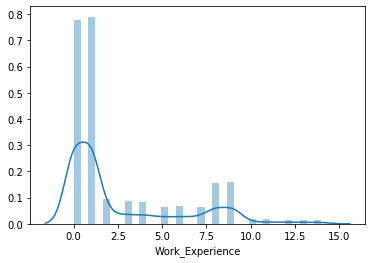

In [144]:
sns.distplot(train['Work_Experience'])

In [145]:
train['Work_Experience'].mean(), train['Work_Experience'].median(),train['Work_Experience'].mode()

(2.641663213150988,
 1.0,
 0    1.0
 dtype: float64)

In [146]:
# we will impute mean for this column
train['Work_Experience'].fillna(train['Work_Experience'].mean(),inplace = True)
test['Work_Experience'].fillna(test['Work_Experience'].mean(),inplace = True)

In [147]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [148]:
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [149]:
train.to_csv('train_clean.csv',index = False)
test.to_csv('test_clean.csv',index = False)